# The Spark Foundation
## GRIPNOV20

### TASK 7

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr


In [2]:
data = pdr.get_data_yahoo('GLD' , '2020-01-01')

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,143.600006,142.800003,143.309998,142.899994,5313500,142.899994
2020-01-02,144.210007,143.399994,143.860001,143.949997,7733800,143.949997
2020-01-03,146.320007,145.399994,145.750000,145.860001,12272800,145.860001
2020-01-06,148.479996,146.949997,148.440002,147.389999,14403300,147.389999
2020-01-07,148.139999,147.429993,147.570007,147.970001,7978500,147.970001


In [4]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-11,175.279999,174.440002,174.699997,174.899994,9008500,174.899994
2020-11-12,176.770004,175.839996,176.039993,175.960007,7167900,175.960007
2020-11-13,177.800003,176.839996,177.649994,177.160004,6469800,177.160004
2020-11-16,177.910004,176.869995,177.229996,177.149994,8358500,177.149994
2020-11-17,177.440002,176.089996,177.250000,176.500000,8189300,176.500000


In [5]:
data_close = pd.DataFrame(data.Close)

In [6]:
data_close['MA_9'] = data_close.Close.rolling(9).mean().shift()
data_close['MA_21'] = data_close.Close.rolling(21).mean().shift()

In [7]:
data_close['MA_9'].head(12)

Date
2019-12-31           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
2020-01-09           NaN
2020-01-10           NaN
2020-01-13           NaN
2020-01-14    145.965556
2020-01-15    146.275557
2020-01-16    146.563334
Name: MA_9, dtype: float64

In [8]:
data_close['MA_21'].head(24)

Date
2019-12-31           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
2020-01-09           NaN
2020-01-10           NaN
2020-01-13           NaN
2020-01-14           NaN
2020-01-15           NaN
2020-01-16           NaN
2020-01-17           NaN
2020-01-21           NaN
2020-01-22           NaN
2020-01-23           NaN
2020-01-24           NaN
2020-01-27           NaN
2020-01-28           NaN
2020-01-29           NaN
2020-01-30           NaN
2020-01-31    146.715238
2020-02-03    147.021429
2020-02-04    147.231429
Name: MA_21, dtype: float64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

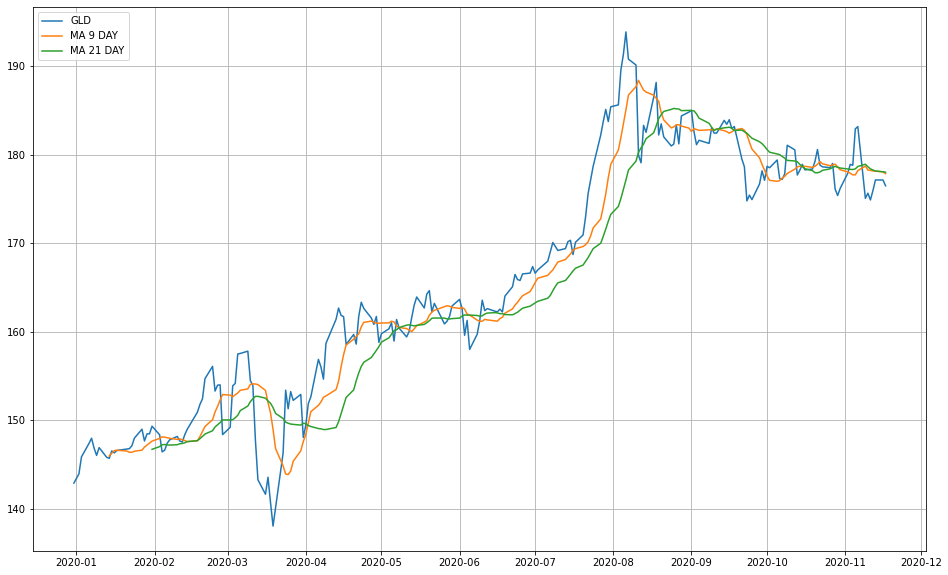

In [10]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(data_close['Close'],label = 'GLD')
plt.plot(data_close['MA_9'],label = 'MA 9 DAY')
plt.plot(data_close['MA_21'],label = 'MA 21 DAY')
plt.legend(loc=2)

In [11]:
data_close['change'] = np.log(data_close['Close']/data_close['Close'].shift())

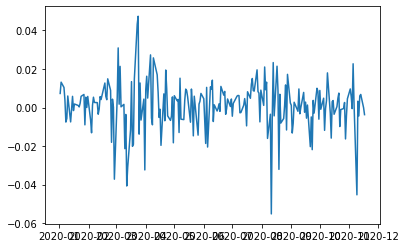

In [12]:
plt.plot(data_close.change)

In [13]:
data_close['Volatility']  = data_close.change.rolling(21).std().shift()

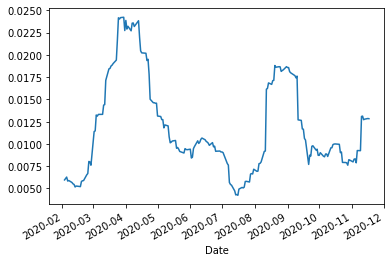

In [14]:
data_close['Volatility'].plot()

In [15]:
data_close['actual_change'] = data_close['Close'] - data_close['Close'].shift(1)

In [16]:
data_close.head()

,Close,MA_9,MA_21,change,Volatility,actual_change
Date,,,,,,
2019-12-31,142.899994,NaN,NaN,NaN,NaN,NaN
2020-01-02,143.949997,NaN,NaN,0.007321,NaN,1.050003
2020-01-03,145.860001,NaN,NaN,0.013181,NaN,1.910004
2020-01-06,147.389999,NaN,NaN,0.010435,NaN,1.529999
2020-01-07,147.970001,NaN,NaN,0.003927,NaN,0.580002


In [17]:
data_close['expected_change'] = data_close['Close'].shift(1) * data_close['Volatility']

In [18]:
data_close.head(10)

,Close,MA_9,MA_21,change,Volatility,actual_change,expected_change
Date,,,,,,,
2019-12-31,142.899994,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,143.949997,NaN,NaN,0.007321,NaN,1.050003,NaN
2020-01-03,145.860001,NaN,NaN,0.013181,NaN,1.910004,NaN
2020-01-06,147.389999,NaN,NaN,0.010435,NaN,1.529999,NaN
2020-01-07,147.970001,NaN,NaN,0.003927,NaN,0.580002,NaN
2020-01-08,146.860001,NaN,NaN,-0.007530,NaN,-1.110001,NaN
2020-01-09,146.029999,NaN,NaN,-0.005668,NaN,-0.830002,NaN
2020-01-10,146.910004,NaN,NaN,0.006008,NaN,0.880005,NaN
2020-01-13,145.820007,NaN,NaN,-0.007447,NaN,-1.089996,NaN


In [19]:
data_close = data_close.iloc[1:]

In [20]:
data_close['Magnitude'] = data_close['actual_change'] / data_close['expected_change']

C:\Users\Taufiq\anaconda64\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Taufiq\anaconda64\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  2.,  0.,  8., 11., 41., 81., 44.,  8.,  6.]),
 array([-5.83553107, -4.9069169 , -3.97830274, -3.04968857, -2.12107441,
        -1.19246024, -0.26384608,  0.66476808,  1.59338225,  2.52199641,
         3.45061058]),
 <a list of 10 Patch objects>)

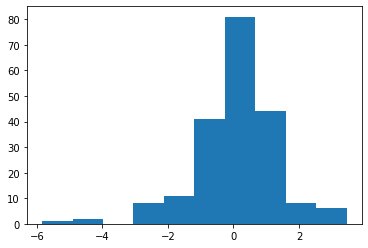

In [21]:
plt.hist(data_close['Magnitude'])

(array([ 1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  3.,  0.,  4.,  2.,  2.,  3.,  2.,  2.,  5.,
         2.,  5., 13., 16., 12., 14., 20., 17., 18., 11., 12., 12.,  6.,
         3.,  3.,  0.,  1.,  2.,  2.,  1.,  1.,  3.,  0.,  1.]),
 array([-5.83553107, -5.64980823, -5.4640854 , -5.27836257, -5.09263973,
        -4.9069169 , -4.72119407, -4.53547124, -4.3497484 , -4.16402557,
        -3.97830274, -3.7925799 , -3.60685707, -3.42113424, -3.23541141,
        -3.04968857, -2.86396574, -2.67824291, -2.49252007, -2.30679724,
        -2.12107441, -1.93535158, -1.74962874, -1.56390591, -1.37818308,
        -1.19246024, -1.00673741, -0.82101458, -0.63529175, -0.44956891,
        -0.26384608, -0.07812325,  0.10759959,  0.29332242,  0.47904525,
         0.66476808,  0.85049092,  1.03621375,  1.22193658,  1.40765942,
         1.59338225,  1.77910508,  1.96482791,  2.15055075,  2.33627358,
         2.52199641,  2.70771925,  2.89344208,  3.07916491,

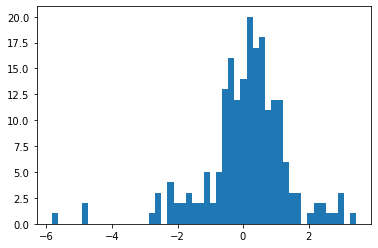

In [22]:
plt.hist(data_close['Magnitude'],bins=50)

In [23]:
data_close['abs_magnitude'] = np.abs(data_close['Magnitude'])

In [24]:
data_close.head()

,Close,MA_9,MA_21,change,Volatility,actual_change,expected_change,Magnitude,abs_magnitude
Date,,,,,,,,,
2020-01-02,143.949997,NaN,NaN,0.007321,NaN,1.050003,NaN,NaN,NaN
2020-01-03,145.860001,NaN,NaN,0.013181,NaN,1.910004,NaN,NaN,NaN
2020-01-06,147.389999,NaN,NaN,0.010435,NaN,1.529999,NaN,NaN,NaN
2020-01-07,147.970001,NaN,NaN,0.003927,NaN,0.580002,NaN,NaN,NaN
2020-01-08,146.860001,NaN,NaN,-0.007530,NaN,-1.110001,NaN,NaN,NaN


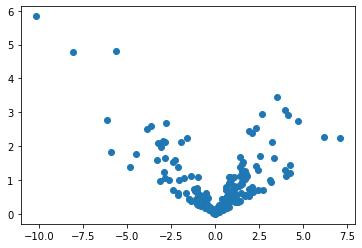

In [25]:
plt.scatter(data_close['actual_change'] , data_close['abs_magnitude'])